In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

In [2]:
p = Path().cwd()
p_predictions = p.parent / "predictions"

PosixPath('/home/villena/interviews/smartestenergy/task/predictions')

In [3]:
price_predictions = pd.read_csv(p_predictions / "price_predictions.csv", index_col=0)
energy_predictions = pd.read_csv(p_predictions / "energy_predictions.csv", index_col=0)

In [4]:
dates = pd.date_range(start="2023/04/03 00:00:00", periods=len(price_predictions), freq="H")
price_predictions = price_predictions.set_index(dates)
energy_predictions = energy_predictions.set_index(dates)

In [5]:
price_targets = price_predictions["target"]
price_predictions = price_predictions.drop(["target"], axis=1)

energy_targets = energy_predictions["target"]
energy_predictions = energy_predictions.drop(["target"], axis=1)

In [6]:
def plot_predictions(predictions: pd.DataFrame, targets: pd.Series, zoom: tuple[int, int] = None):
    
    if zoom:
        predictions = predictions[zoom[0]:zoom[1]]
        targets= targets[zoom[0]:zoom[1]]
        
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

    predictions.plot(ax=ax, alpha=0.5)
    targets.plot(ax=ax, color="r", style="o")

    plt.ylabel("Price [GBP/MWh]")
    plt.xlabel("Time [h]")
    plt.legend()
    plt.grid()
    plt.title("Predictions against target")

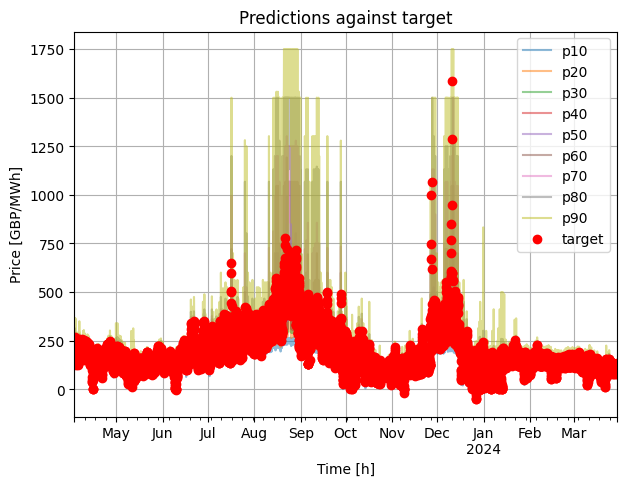

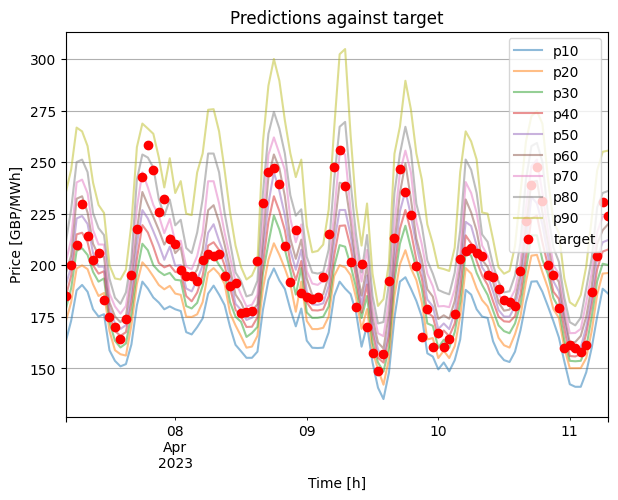

In [7]:
plot_predictions(price_predictions, price_targets)
plot_predictions(price_predictions, price_targets, zoom=(100, 200))

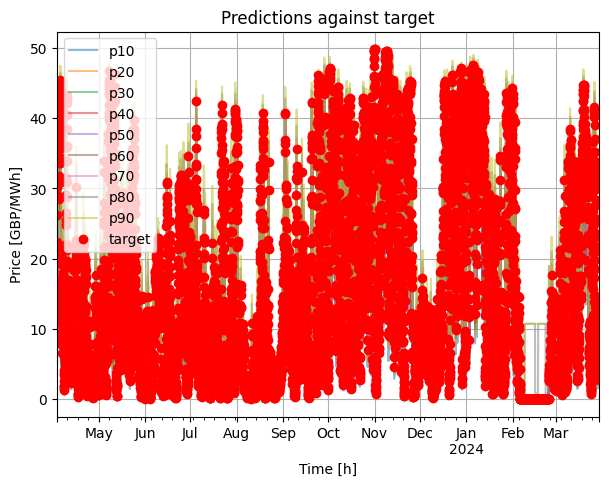

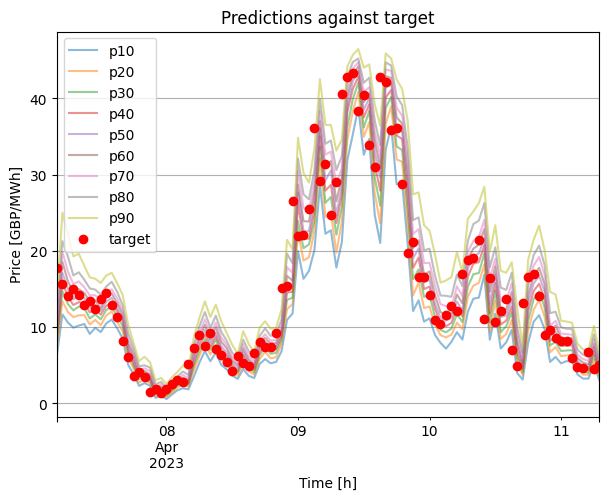

In [8]:
plot_predictions(energy_predictions, energy_targets)
plot_predictions(energy_predictions, energy_targets, zoom=(100, 200))